In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle
from random import sample

from utils import *

In [2]:
#selected subset of dates. 
val_dates = ['180327','180329']
test_dates = ['180330','180331']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/'
model_saving_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models'
CH = 23

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256, CH = CH)

In [3]:
# Balance Validation Dataset
sleep_files = []
move_files = []
for t in range(len(val_files)):
    if 'sleep' in val_files[t][0]:
        sleep_files.append(val_files[t])
    if 'move' in val_files[t][0]:
        move_files.append(val_files[t])

sleep_sample = sample(sleep_files, len(move_files))
val_2_files = sleep_sample+move_files
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_2_files, test_files,load_path, batch_size=256,CH = CH)

## Check balance
# count_sleep = 0
# count_move = 0
# for t in range(len(val_2_files)):
#     if 'sleep' in val_2_files[t][0]:
#         count_sleep+=1
#     if 'move' in val_2_files[t][0]:
#         count_move +=1 
# print(count_sleep, count_move)


In [4]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 1, 100, 10])
torch.Size([256, 1])
256
256
256


date:180324, rec:008, time:5394.0


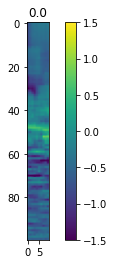

date:180325, rec:001, time:900.0


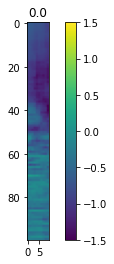

date:180323, rec:007, time:5621.0


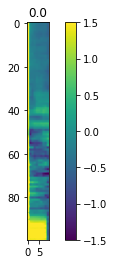

date:180324, rec:004, time:5209.0


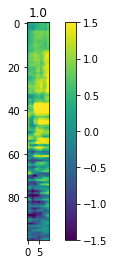

date:180325, rec:001, time:790.0


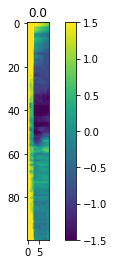

date:180324, rec:008, time:6874.0


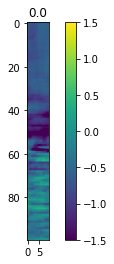

date:180325, rec:003, time:4962.0


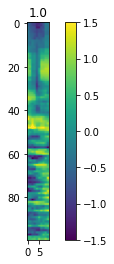

date:180322, rec:003, time:5293.0


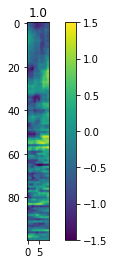

date:180324, rec:008, time:2438.0


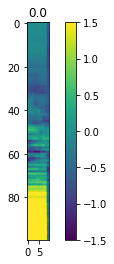

date:180324, rec:001, time:760.0


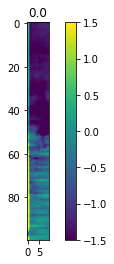

date:180325, rec:003, time:4533.0


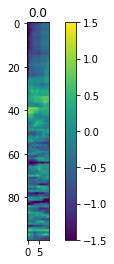

date:180325, rec:009, time:4368.0


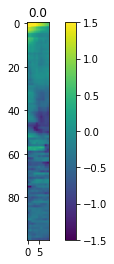

date:180325, rec:006, time:889.0


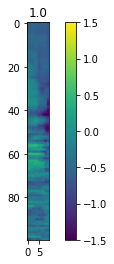

date:180325, rec:007, time:3819.0


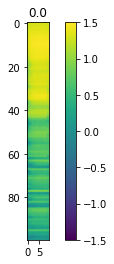

date:180323, rec:007, time:2865.0


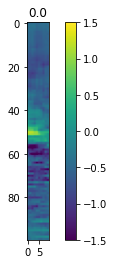

date:180325, rec:006, time:6211.0


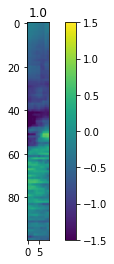

date:180401, rec:001, time:1080.0


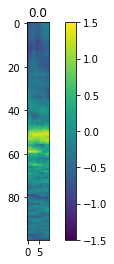

date:180323, rec:007, time:5711.0


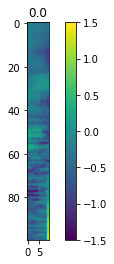

date:180322, rec:007, time:1647.0


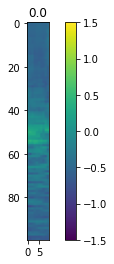

date:180322, rec:003, time:6646.0


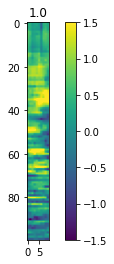

date:180325, rec:002, time:4118.0


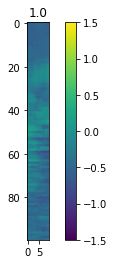

date:180401, rec:001, time:2619.0


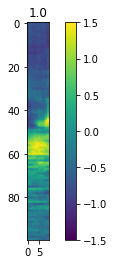

date:180322, rec:007, time:3309.0


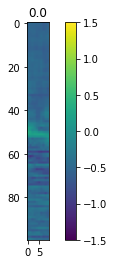

date:180324, rec:006, time:5515.0


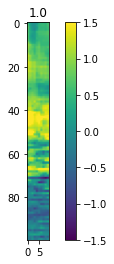

date:180325, rec:002, time:1762.0


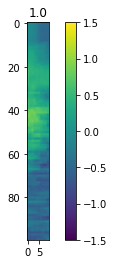

date:180325, rec:001, time:70.0


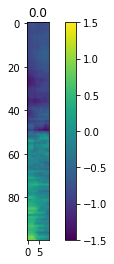

date:180324, rec:008, time:4699.0


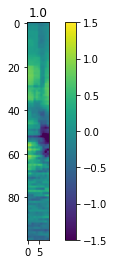

date:180322, rec:007, time:1357.0


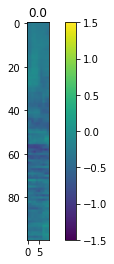

date:180324, rec:008, time:1651.0


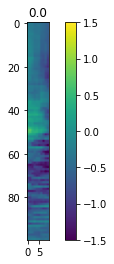

date:180325, rec:007, time:2876.0


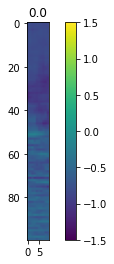

date:180324, rec:005, time:2370.0


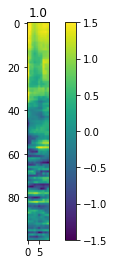

date:180324, rec:006, time:6173.0


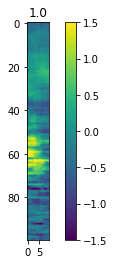

date:180324, rec:008, time:2458.0


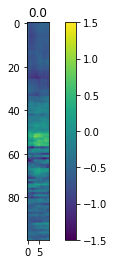

date:180325, rec:009, time:2190.0


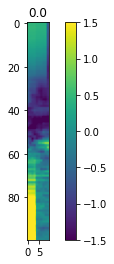

date:180325, rec:003, time:190.0


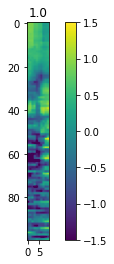

date:180401, rec:001, time:930.0


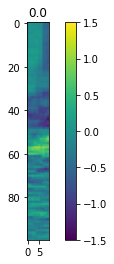

date:180325, rec:007, time:2656.0


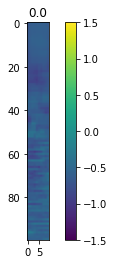

date:180325, rec:001, time:900.0


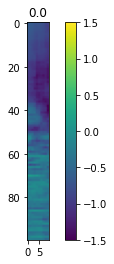

date:180325, rec:009, time:4789.0


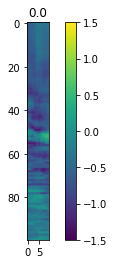

date:180325, rec:005, time:4953.0


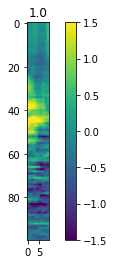

date:180401, rec:001, time:1070.0


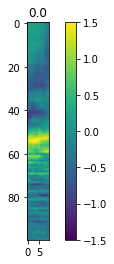

date:180324, rec:001, time:2241.0


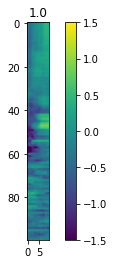

date:180325, rec:009, time:3546.0


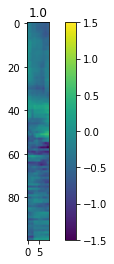

date:180324, rec:008, time:1371.0


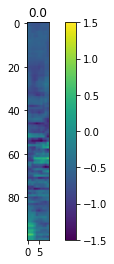

date:180325, rec:007, time:3819.0


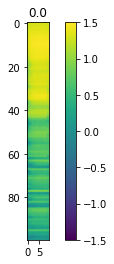

date:180324, rec:001, time:2647.0


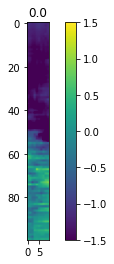

date:180325, rec:007, time:6283.0


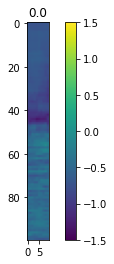

date:180325, rec:003, time:4573.0


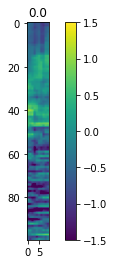

date:180324, rec:004, time:6472.0


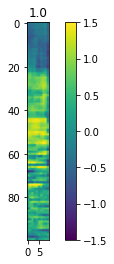

date:180401, rec:001, time:1210.0


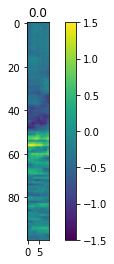

date:180325, rec:003, time:7014.0


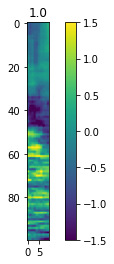

date:180324, rec:009, time:1067.0


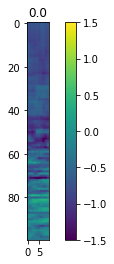

date:180325, rec:007, time:2706.0


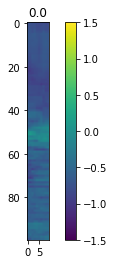

date:180325, rec:009, time:2190.0


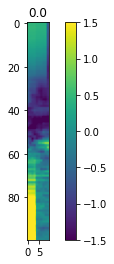

date:180325, rec:007, time:3156.0


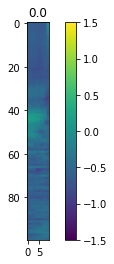

date:180324, rec:004, time:2259.0


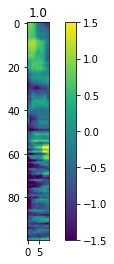

date:180324, rec:008, time:2698.0


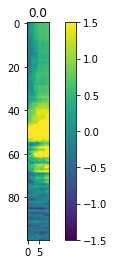

date:180325, rec:001, time:1540.0


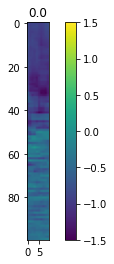

date:180323, rec:007, time:4692.0


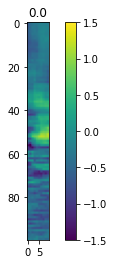

date:180322, rec:004, time:4139.0


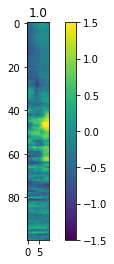

date:180323, rec:002, time:470.0


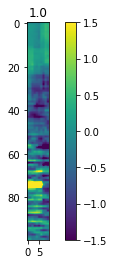

date:180322, rec:005, time:1775.0


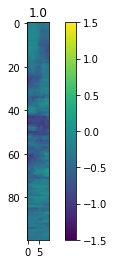

date:180322, rec:002, time:6111.0


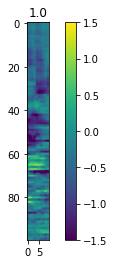

date:180325, rec:006, time:6421.0


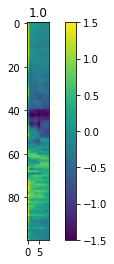

date:180325, rec:009, time:1950.0


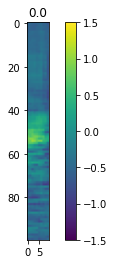

date:180324, rec:008, time:793.0


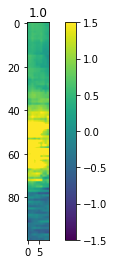

date:180324, rec:009, time:1087.0


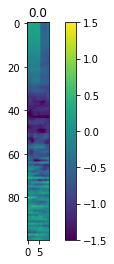

date:180325, rec:006, time:261.0


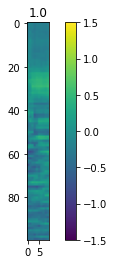

date:180324, rec:001, time:1722.0


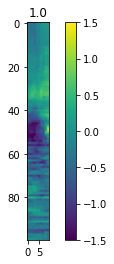

date:180323, rec:002, time:6958.0


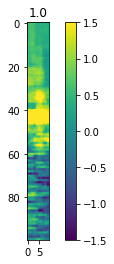

date:180325, rec:006, time:1928.0


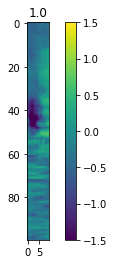

date:180323, rec:005, time:2237.0


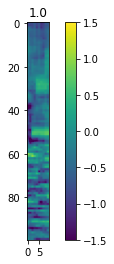

date:180323, rec:003, time:3251.0


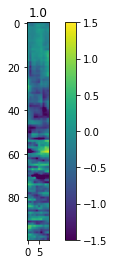

date:180323, rec:004, time:3433.0


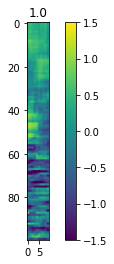

date:180401, rec:001, time:1970.0


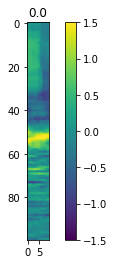

date:180401, rec:001, time:990.0


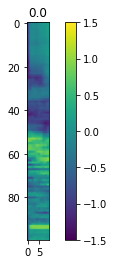

date:180325, rec:009, time:880.0


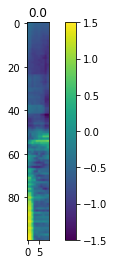

date:180325, rec:006, time:5438.0


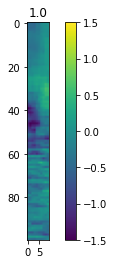

date:180325, rec:002, time:5038.0


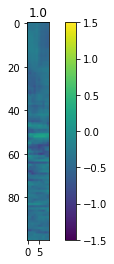

date:180324, rec:009, time:1422.0


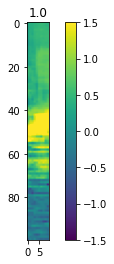

date:180325, rec:005, time:2566.0


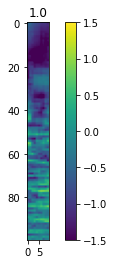

date:180322, rec:005, time:1735.0


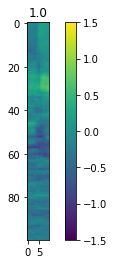

date:180325, rec:007, time:3412.0


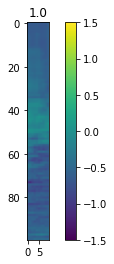

date:180323, rec:007, time:5691.0


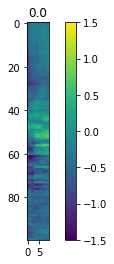

date:180324, rec:006, time:3389.0


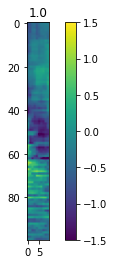

date:180401, rec:001, time:1460.0


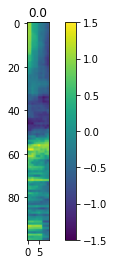

date:180322, rec:007, time:1517.0


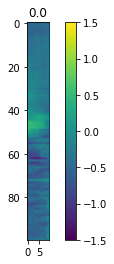

date:180323, rec:007, time:2249.0


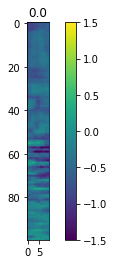

date:180324, rec:003, time:520.0


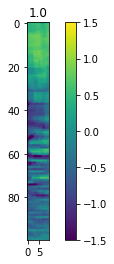

date:180324, rec:001, time:1712.0


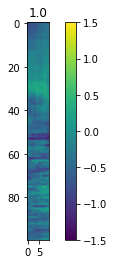

date:180325, rec:009, time:4629.0


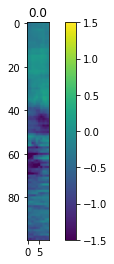

date:180401, rec:001, time:340.0


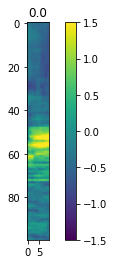

date:180401, rec:002, time:2916.0


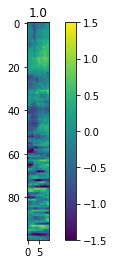

date:180325, rec:007, time:4383.0


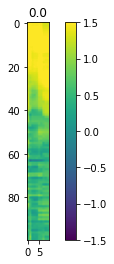

date:180322, rec:007, time:4040.0


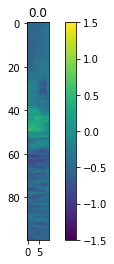

date:180325, rec:002, time:1962.0


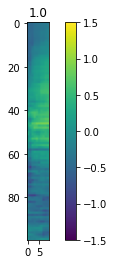

date:180325, rec:005, time:1384.0


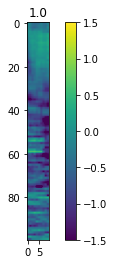

date:180325, rec:009, time:5465.0


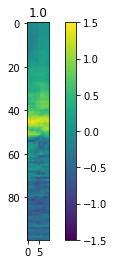

date:180325, rec:001, time:70.0


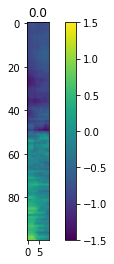

date:180322, rec:003, time:3198.0


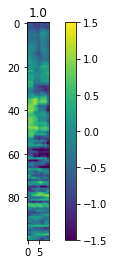

date:180325, rec:001, time:880.0


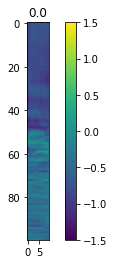

date:180325, rec:007, time:1254.0


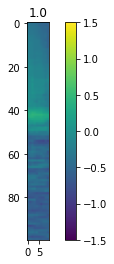

date:180325, rec:003, time:6757.0


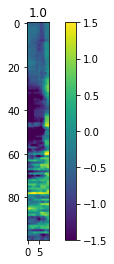

date:180325, rec:004, time:6820.0


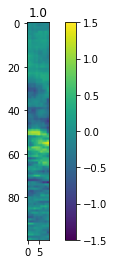

date:180322, rec:004, time:3968.0


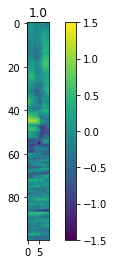

date:180322, rec:007, time:1557.0


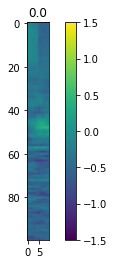

date:180325, rec:009, time:2190.0


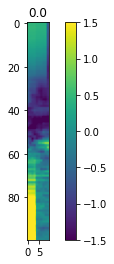

date:180324, rec:008, time:3623.0


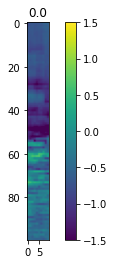

date:180325, rec:009, time:2240.0


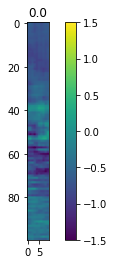

date:180322, rec:003, time:260.0


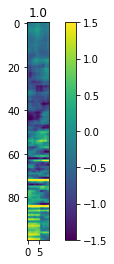

date:180323, rec:007, time:4762.0


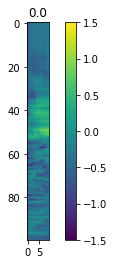

date:180325, rec:001, time:4876.0


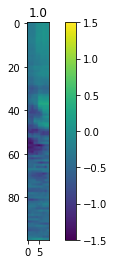

date:180322, rec:003, time:2898.0


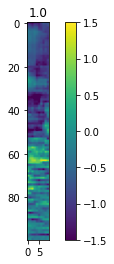

date:180323, rec:003, time:5701.0


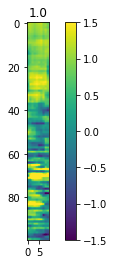

date:180322, rec:003, time:4797.0


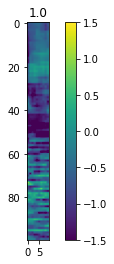

date:180324, rec:008, time:5144.0


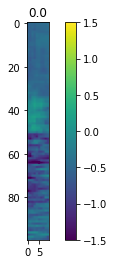

date:180325, rec:001, time:70.0


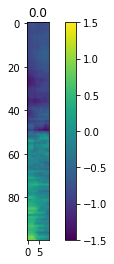

date:180325, rec:007, time:3146.0


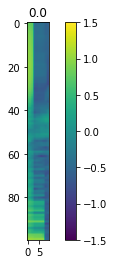

date:180325, rec:004, time:4664.0


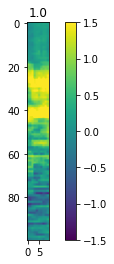

date:180325, rec:009, time:1260.0


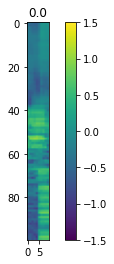

date:180322, rec:007, time:1417.0


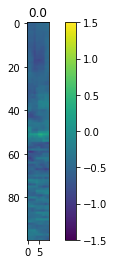

date:180323, rec:007, time:6901.0


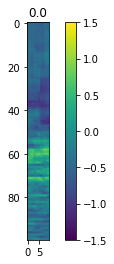

date:180324, rec:001, time:918.0


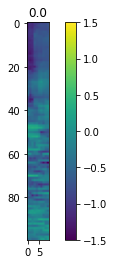

date:180323, rec:004, time:3503.0


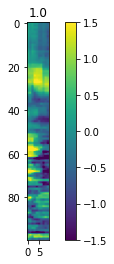

date:180325, rec:002, time:7119.0


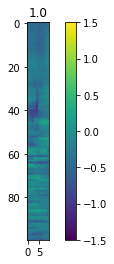

date:180325, rec:001, time:1560.0


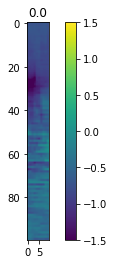

date:180401, rec:001, time:1080.0


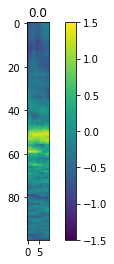

date:180325, rec:009, time:1200.0


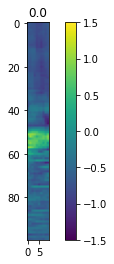

In [5]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

### Logistic regression with no regularization

In [6]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim = 1):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = x.reshape([x.shape[0], 1, -1]).float()
        outputs = self.linear(x)
        return outputs



In [7]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha=0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'

Train loss for epoch 0: 0.5427334904670715
Val loss for epoch 0: 0.49949169158935547
Train loss for epoch 1: 0.5106207132339478
Val loss for epoch 1: 0.4936778247356415
1
Train loss for epoch 2: 0.5023773312568665
Val loss for epoch 2: 0.49422767758369446
Train loss for epoch 3: 0.49589306116104126
Val loss for epoch 3: 0.487531840801239
3
Train loss for epoch 4: 0.4898925721645355
Val loss for epoch 4: 0.47512128949165344
4
Train loss for epoch 5: 0.4848156273365021
Val loss for epoch 5: 0.4743691384792328
5
Train loss for epoch 6: 0.4811255931854248
Val loss for epoch 6: 0.48407861590385437
Train loss for epoch 7: 0.47708529233932495
Val loss for epoch 7: 0.46597814559936523
7
Train loss for epoch 8: 0.4755871891975403
Val loss for epoch 8: 0.47850194573402405
Train loss for epoch 9: 0.4722614288330078
Val loss for epoch 9: 0.4634464383125305
9
Train loss for epoch 10: 0.4685162901878357
Val loss for epoch 10: 0.4728762209415436
Train loss for epoch 11: 0.468895822763443
Val loss for

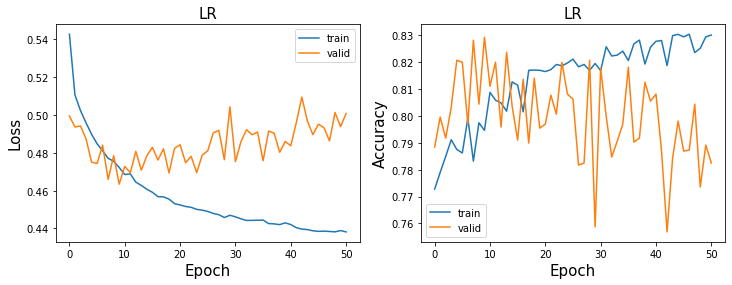

In [9]:
model = LogisticRegression(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device, reduction = 'sum')
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device, reduction = 'sum')
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_testing.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)

    if train_loss < tol:
        break
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)


### Logistic regression with l2 regularization

In [10]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1, 50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'





Train loss for epoch 0: 0.5357199907302856
Val loss for epoch 0: 0.48924940824508667
Train loss for epoch 1: 0.5145180225372314
Val loss for epoch 1: 0.5077208280563354
Train loss for epoch 2: 0.5043172240257263
Val loss for epoch 2: 0.49554285407066345
Train loss for epoch 3: 0.4980819821357727
Val loss for epoch 3: 0.47811171412467957
3
Train loss for epoch 4: 0.4939115643501282
Val loss for epoch 4: 0.4870755076408386
Train loss for epoch 5: 0.48909854888916016
Val loss for epoch 5: 0.4826821982860565
Train loss for epoch 6: 0.4847903549671173
Val loss for epoch 6: 0.4791065454483032
Train loss for epoch 7: 0.48147448897361755
Val loss for epoch 7: 0.4804878830909729
Train loss for epoch 8: 0.4781586229801178
Val loss for epoch 8: 0.47518885135650635
8
Train loss for epoch 9: 0.4765256345272064
Val loss for epoch 9: 0.475276917219162
Train loss for epoch 10: 0.4737657308578491
Val loss for epoch 10: 0.47928956151008606
Train loss for epoch 11: 0.4716170132160187
Val loss for epoch 1

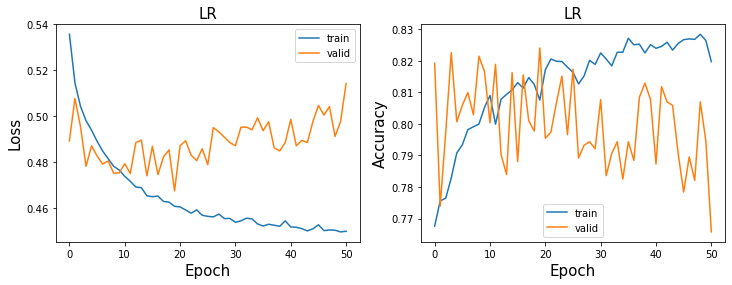

Train loss for epoch 0: 0.6392836570739746
Val loss for epoch 0: 0.5563278794288635
Train loss for epoch 1: 0.5767301917076111
Val loss for epoch 1: 0.5327370166778564
1
Train loss for epoch 2: 0.5695412755012512
Val loss for epoch 2: 0.5245764255523682
2
Train loss for epoch 3: 0.5666821599006653
Val loss for epoch 3: 0.5287867784500122
Train loss for epoch 4: 0.5638101696968079
Val loss for epoch 4: 0.5292216539382935
Train loss for epoch 5: 0.5600700974464417
Val loss for epoch 5: 0.5214416980743408
5
Train loss for epoch 6: 0.5584827065467834
Val loss for epoch 6: 0.5110480189323425
6
Train loss for epoch 7: 0.5575996041297913
Val loss for epoch 7: 0.5197961330413818
Train loss for epoch 8: 0.5549266338348389
Val loss for epoch 8: 0.5219166874885559
Train loss for epoch 9: 0.5542315244674683
Val loss for epoch 9: 0.5093200206756592
9
Train loss for epoch 10: 0.5524163246154785
Val loss for epoch 10: 0.5123199820518494
Train loss for epoch 11: 0.551521360874176
Val loss for epoch 11

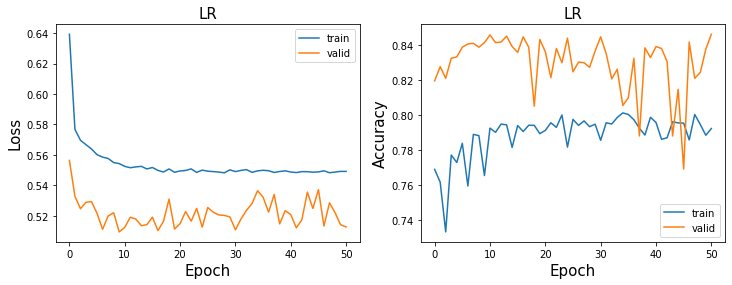

Train loss for epoch 0: 0.6969507336616516
Val loss for epoch 0: 0.5746357440948486
Train loss for epoch 1: 0.6035028100013733
Val loss for epoch 1: 0.556641161441803
1
Train loss for epoch 2: 0.599958062171936
Val loss for epoch 2: 0.5555514693260193
2
Train loss for epoch 3: 0.5969220399856567
Val loss for epoch 3: 0.5704441070556641
Train loss for epoch 4: 0.5948348045349121
Val loss for epoch 4: 0.5495051741600037
4
Train loss for epoch 5: 0.5942321419715881
Val loss for epoch 5: 0.5527041554450989
Train loss for epoch 6: 0.5901414155960083
Val loss for epoch 6: 0.5594049692153931
Train loss for epoch 7: 0.5886209011077881
Val loss for epoch 7: 0.5516160130500793
Train loss for epoch 8: 0.587732195854187
Val loss for epoch 8: 0.552785336971283
Train loss for epoch 9: 0.5870230793952942
Val loss for epoch 9: 0.5544862747192383
Train loss for epoch 10: 0.5868481993675232
Val loss for epoch 10: 0.5612685680389404
Train loss for epoch 11: 0.5868692994117737
Val loss for epoch 11: 0.549

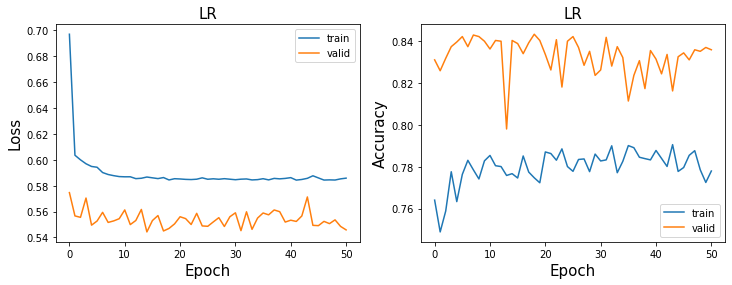

In [11]:
for alpha in alphas:
    model = GLM(input_dim=100*10).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_testing.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

### Logistic regression with finite difference regularization

In [12]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'



Train loss for epoch 0: 0.5510587692260742
Val loss for epoch 0: 0.49010229110717773
Train loss for epoch 1: 0.516334593296051
Val loss for epoch 1: 0.5026766657829285
Train loss for epoch 2: 0.5084309577941895
Val loss for epoch 2: 0.4948635399341583
Train loss for epoch 3: 0.5002862811088562
Val loss for epoch 3: 0.49206534028053284
Train loss for epoch 4: 0.4957953989505768
Val loss for epoch 4: 0.4786016047000885
4
Train loss for epoch 5: 0.4927035868167877
Val loss for epoch 5: 0.482130765914917
Train loss for epoch 6: 0.4869830906391144
Val loss for epoch 6: 0.47581297159194946
6
Train loss for epoch 7: 0.4844346046447754
Val loss for epoch 7: 0.47770366072654724
Train loss for epoch 8: 0.48081591725349426
Val loss for epoch 8: 0.4844648241996765
Train loss for epoch 9: 0.47910305857658386
Val loss for epoch 9: 0.4896208345890045
Train loss for epoch 10: 0.47608619928359985
Val loss for epoch 10: 0.4726042151451111
10
Train loss for epoch 11: 0.47499147057533264
Val loss for epoc

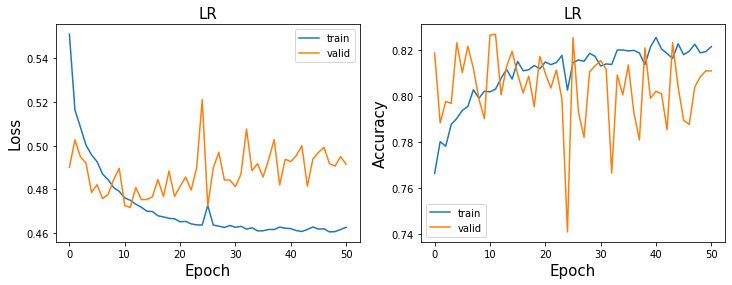

Train loss for epoch 0: 0.6512544751167297
Val loss for epoch 0: 0.4997554123401642
Train loss for epoch 1: 0.5397788882255554
Val loss for epoch 1: 0.5024791359901428
Train loss for epoch 2: 0.5362290143966675
Val loss for epoch 2: 0.49677619338035583
2
Train loss for epoch 3: 0.534609317779541
Val loss for epoch 3: 0.49091434478759766
3
Train loss for epoch 4: 0.5302549004554749
Val loss for epoch 4: 0.5113072991371155
Train loss for epoch 5: 0.5270881056785583
Val loss for epoch 5: 0.49648526310920715
Train loss for epoch 6: 0.5248305797576904
Val loss for epoch 6: 0.49195942282676697
Train loss for epoch 7: 0.5247840881347656
Val loss for epoch 7: 0.5041199922561646
Train loss for epoch 8: 0.5217215418815613
Val loss for epoch 8: 0.4833419919013977
8
Train loss for epoch 9: 0.5208534598350525
Val loss for epoch 9: 0.49765071272850037
Train loss for epoch 10: 0.5195021033287048
Val loss for epoch 10: 0.4825078547000885
10
Train loss for epoch 11: 0.5189926028251648
Val loss for epoc

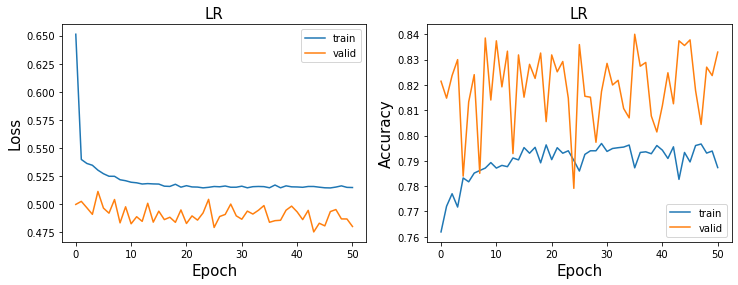

Train loss for epoch 0: 0.7615129947662354
Val loss for epoch 0: 0.5139854550361633
Train loss for epoch 1: 0.552672266960144
Val loss for epoch 1: 0.5043379664421082
1
Train loss for epoch 2: 0.5490016937255859
Val loss for epoch 2: 0.5048791766166687
Train loss for epoch 3: 0.5458711385726929
Val loss for epoch 3: 0.5081452131271362
Train loss for epoch 4: 0.5429123640060425
Val loss for epoch 4: 0.4981358051300049
4
Train loss for epoch 5: 0.5419843196868896
Val loss for epoch 5: 0.5007104277610779
Train loss for epoch 6: 0.540191113948822
Val loss for epoch 6: 0.4964572489261627
6
Train loss for epoch 7: 0.5377733111381531
Val loss for epoch 7: 0.503451406955719
Train loss for epoch 8: 0.5363666415214539
Val loss for epoch 8: 0.49672070145606995
Train loss for epoch 9: 0.5357639193534851
Val loss for epoch 9: 0.5023724436759949
Train loss for epoch 10: 0.5342161655426025
Val loss for epoch 10: 0.4900733530521393
10
Train loss for epoch 11: 0.533790647983551
Val loss for epoch 11: 0

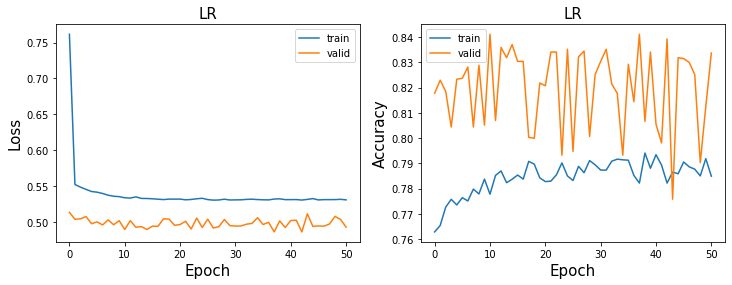

In [13]:
for alpha in alphas:
    model = GLM(input_dim=100*10).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_testing.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)